In [1]:
import itertools as it

import seaborn as sns
import matplotlib.pyplot as plt

import interpret

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
groupped_results = interpret.import_from_dir("../results/rand/", lambda args: f"func{args['opt_func']}-p{args['rand_prob']}-f{args['genformat']}")
results_df = interpret.convert_to_dataframe(groupped_results)

In [7]:
results_df[(results_df.group == "func3-p0.0-f0") & (results_df.run_idx == 0)].nevals.sum()

4241

In [3]:
results_df["func"] = results_df.group.apply(lambda x: x.split('-')[0])
results_df["prob"] = results_df.group.apply(lambda x: x.split('-')[1])
results_df["prob_num"] = results_df.prob.apply(lambda x: float(x[1:]))
results_df["format"] = results_df.group.apply(lambda x: x.split('-')[2])

In [54]:
probs = [f"p{str(s)}" for s in (0.0, 0.001, 0.01, 0.05, 0.1, 0.5)]
funcs = [f"func{i}" for i in range(3, 6)]
formats = ["f0", "f1"]
cols = sns.color_palette("YlOrRd", len(probs))

custom_colors = dict(zip(probs, cols))

In [55]:
func_min = dict(results_df.groupby("func")["max"].min())
func_max = dict(results_df.groupby("func")["max"].max())

func_min["func5"] = 994

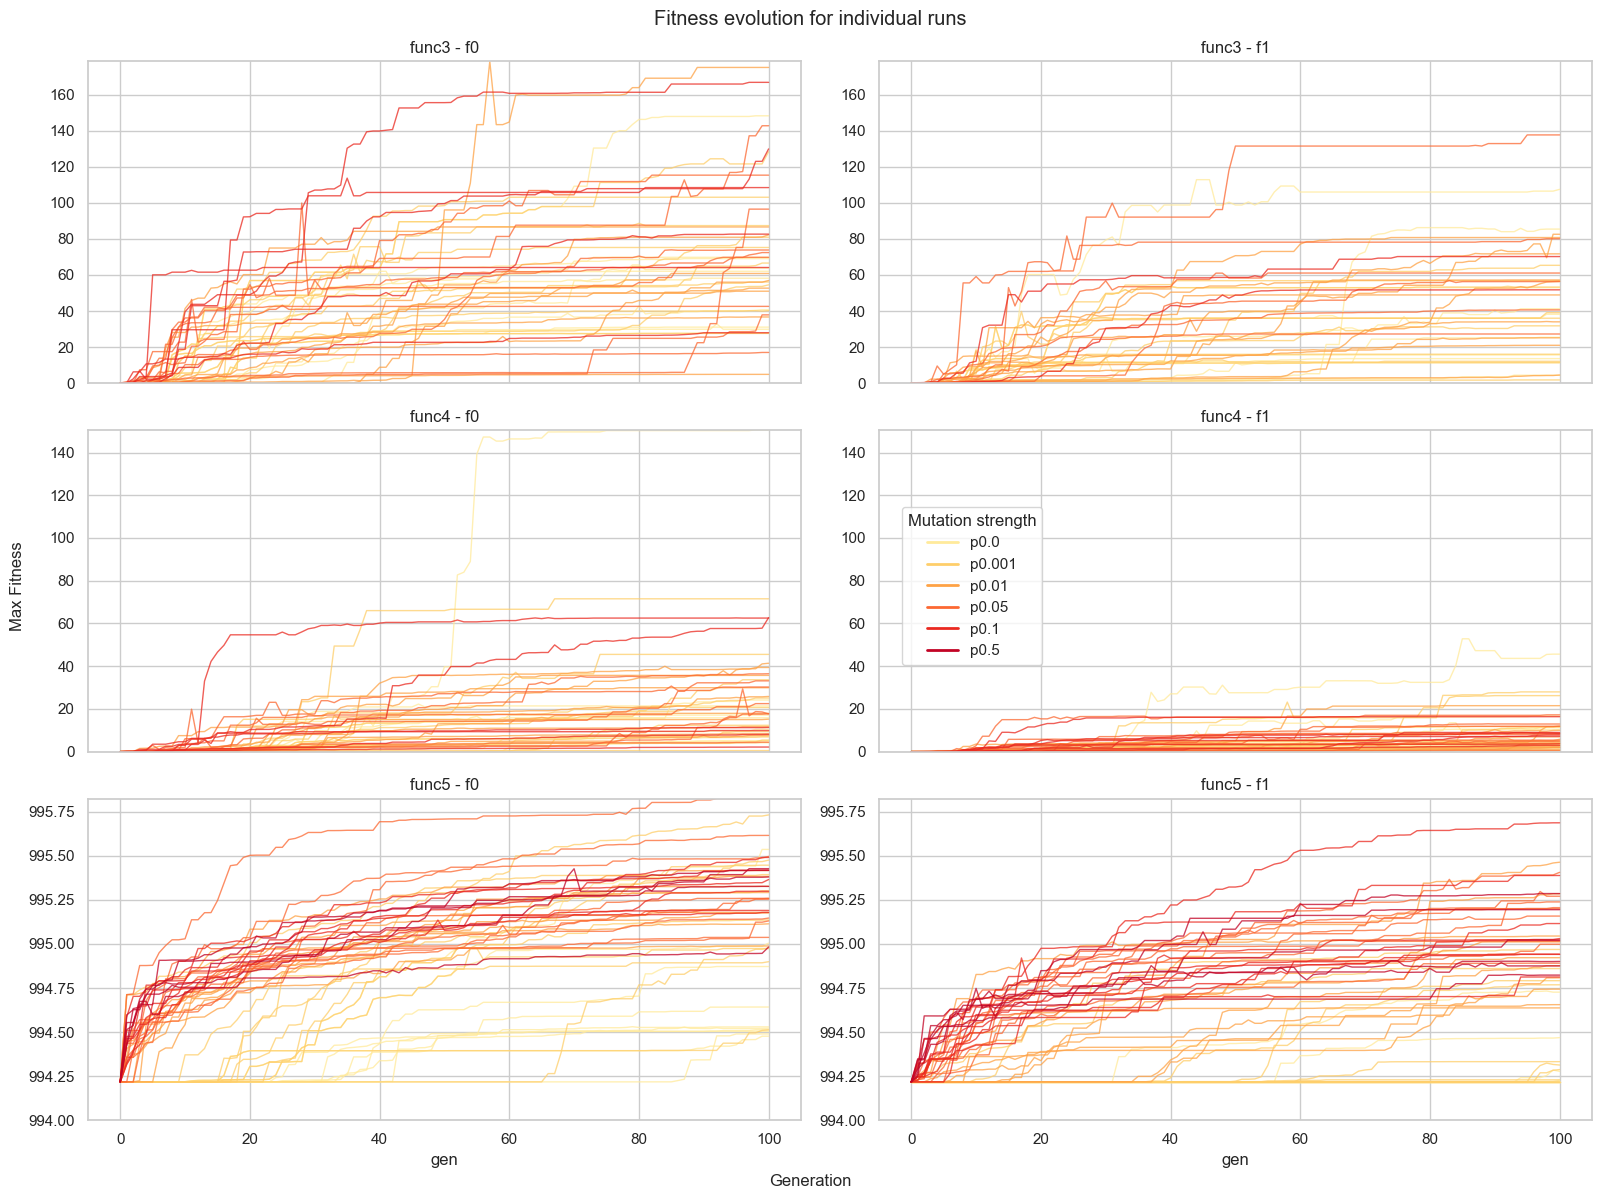

In [56]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(16, 12), sharey=False, sharex=True)
combinations = list(it.product(funcs, formats))

for (func, fmt), ax in zip(combinations, axs.flatten()):
    sns.lineplot(x="gen", y="max", hue="prob", style="format",  data=results_df[(results_df.format == fmt) & (results_df.func == func)], units="run_idx", estimator=None, lw=1, palette=custom_colors, ax=ax, legend=False, alpha=0.75)
    ax.set_ylim(func_min[func], func_max[func])
    ax.set_title(f"{func} - {fmt}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Generation', ha='center')
fig.text(0, 0.5, 'Max Fitness', va='center', rotation='vertical')
# add custom legend
fig.legend(
    [plt.Line2D([0], [0], color=custom_colors[s], lw=2) for s in probs],
    probs,
    loc='center right',
    title="Randomizer Probability",
    bbox_to_anchor=(0.65, 0.5)
)
plt.suptitle("Fitness evolution for individual runs")
plt.tight_layout()
plt.show()

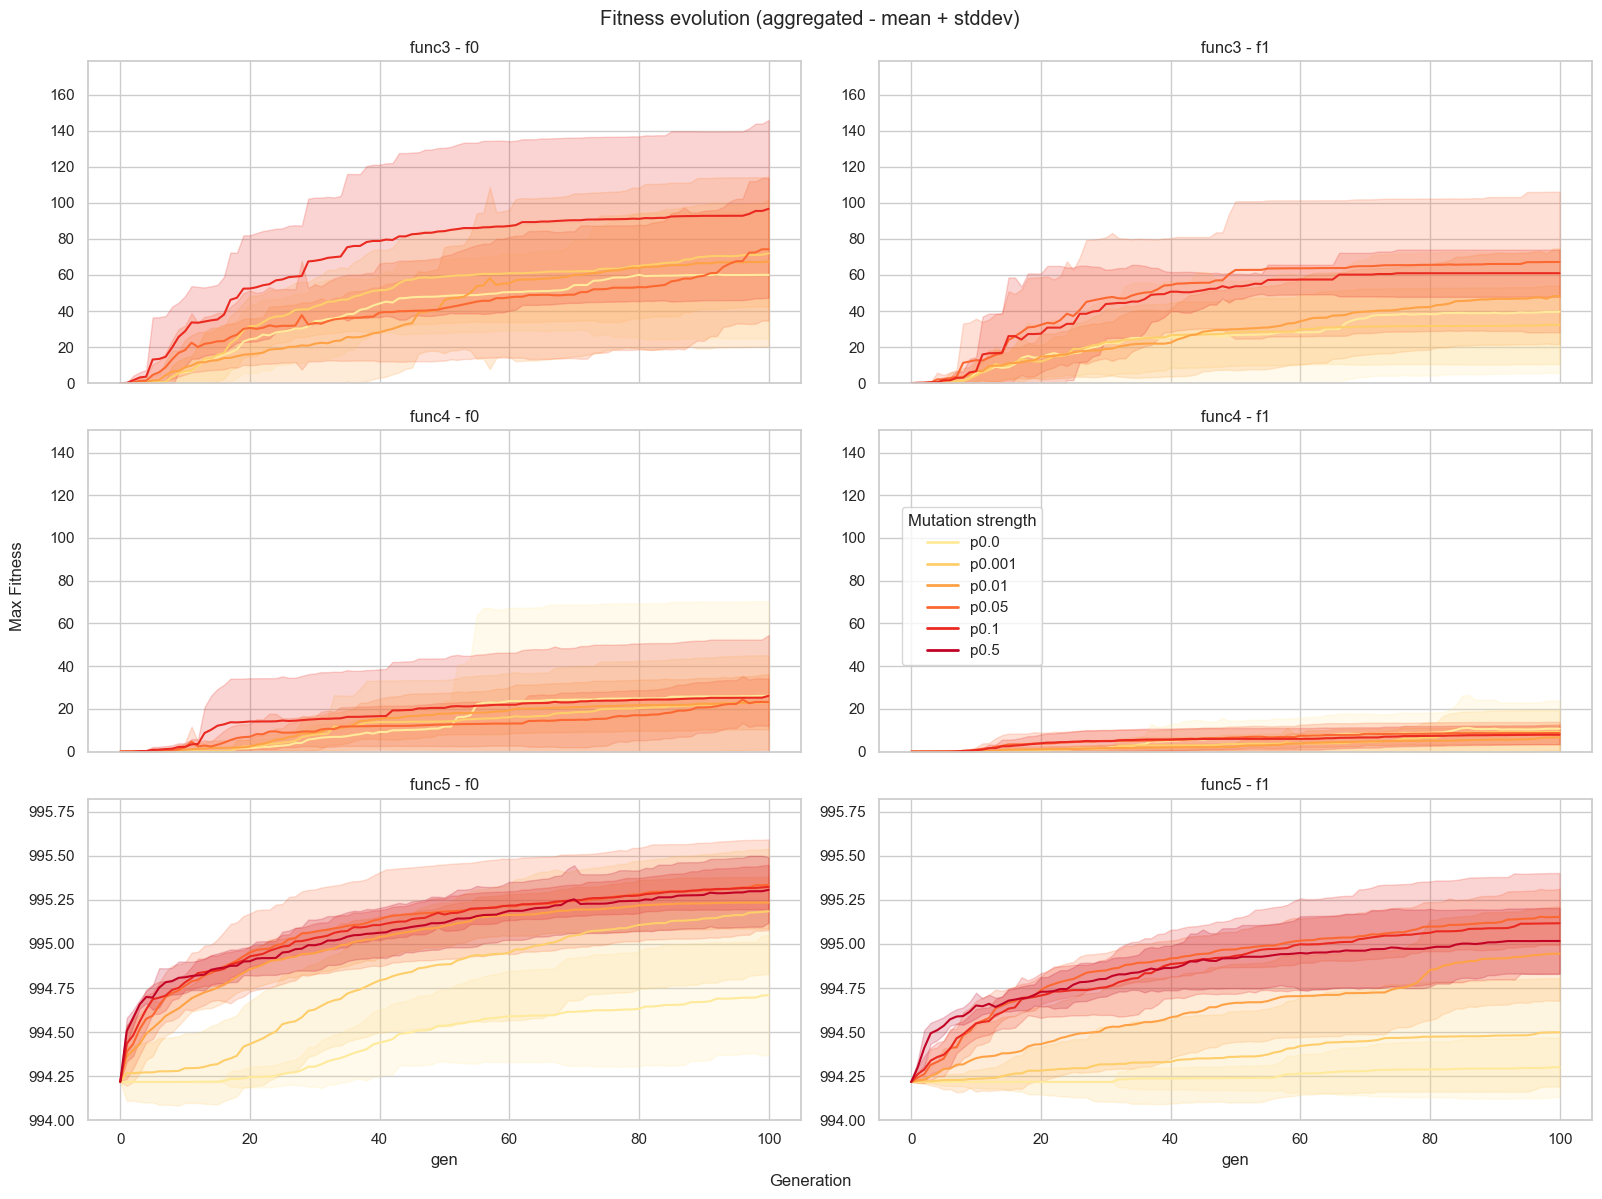

In [57]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12), sharey=False, sharex=True)
combinations = list(it.product(funcs, formats))

for (func, fmt), ax in zip(combinations, axs.flatten()):
    sns.lineplot(x="gen", y="max", hue="prob", style="format",  data=results_df[(results_df.format == fmt) & (results_df.func == func)], errorbar="sd", palette=custom_colors, ax=ax, legend=False)
    ax.set_ylim(func_min[func], func_max[func])
    ax.set_title(f"{func} - {fmt}")
    ax.set_ylabel("")

fig.text(0.5, 0, 'Generation', ha='center')
fig.text(0, 0.5, 'Max Fitness', va='center', rotation='vertical')
# add custom legend
fig.legend(
    [plt.Line2D([0], [0], color=custom_colors[s], lw=2) for s in probs],
    probs,
    loc='center right',
    title="Randomizer Probability",
    bbox_to_anchor=(0.65, 0.5)
)
plt.suptitle("Fitness evolution (aggregated - mean + stddev)")
plt.tight_layout()
plt.show()

In [58]:
end_results = results_df[results_df.gen == results_df.gen.max()].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()

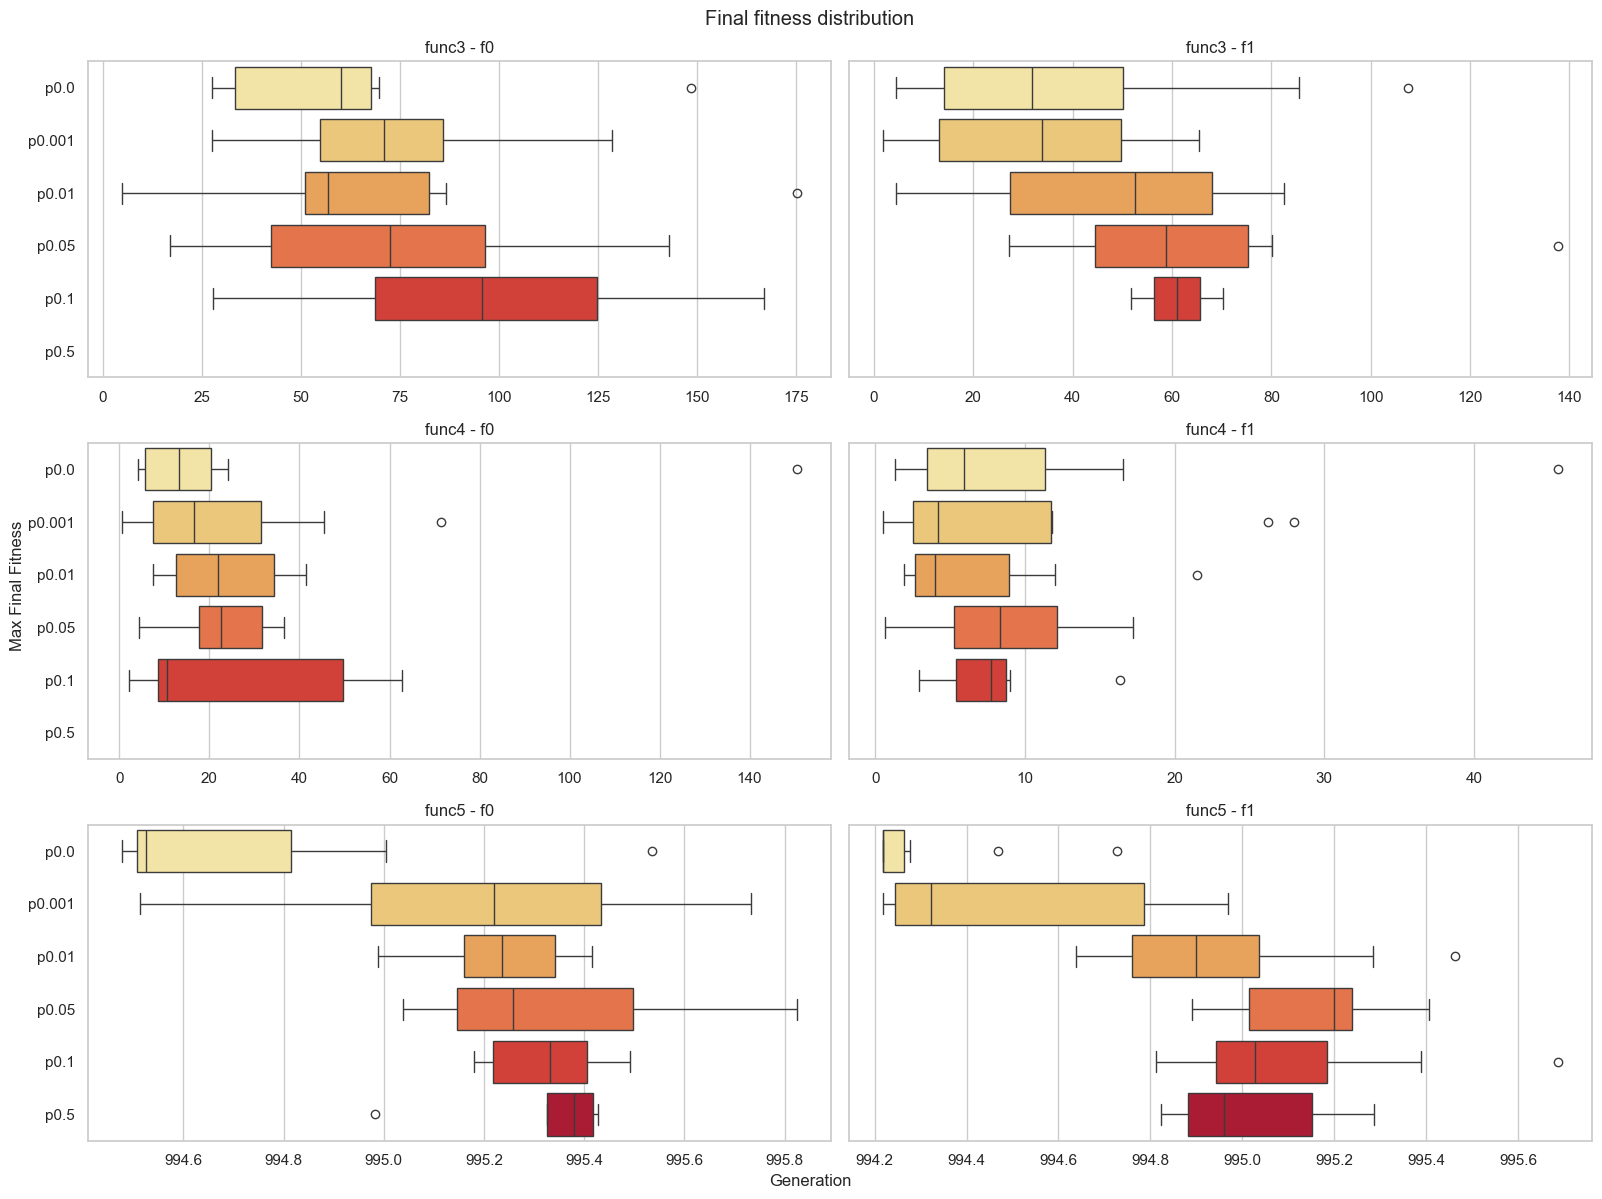

In [71]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12), sharey=True, sharex=False)
combinations = list(it.product(funcs, formats))

for (func, fmt), ax in zip(combinations, axs.flatten()):
    subset = end_results[(end_results.format == fmt) & (end_results.func == func)]
    sns.boxplot(y="prob", x="max", data=subset, palette=custom_colors, hue="prob", ax=ax, order=probs)
    ax.set_title(f"{func} - {fmt}")
    ax.set_ylabel("")
    ax.set_xlabel("")

fig.text(0.5, 0, 'Max Final Fitness', ha='center')
fig.text(0, 0.5, 'Randomizer Probability', va='center', rotation='vertical')

plt.suptitle("Final fitness distribution")
plt.tight_layout()
plt.show()

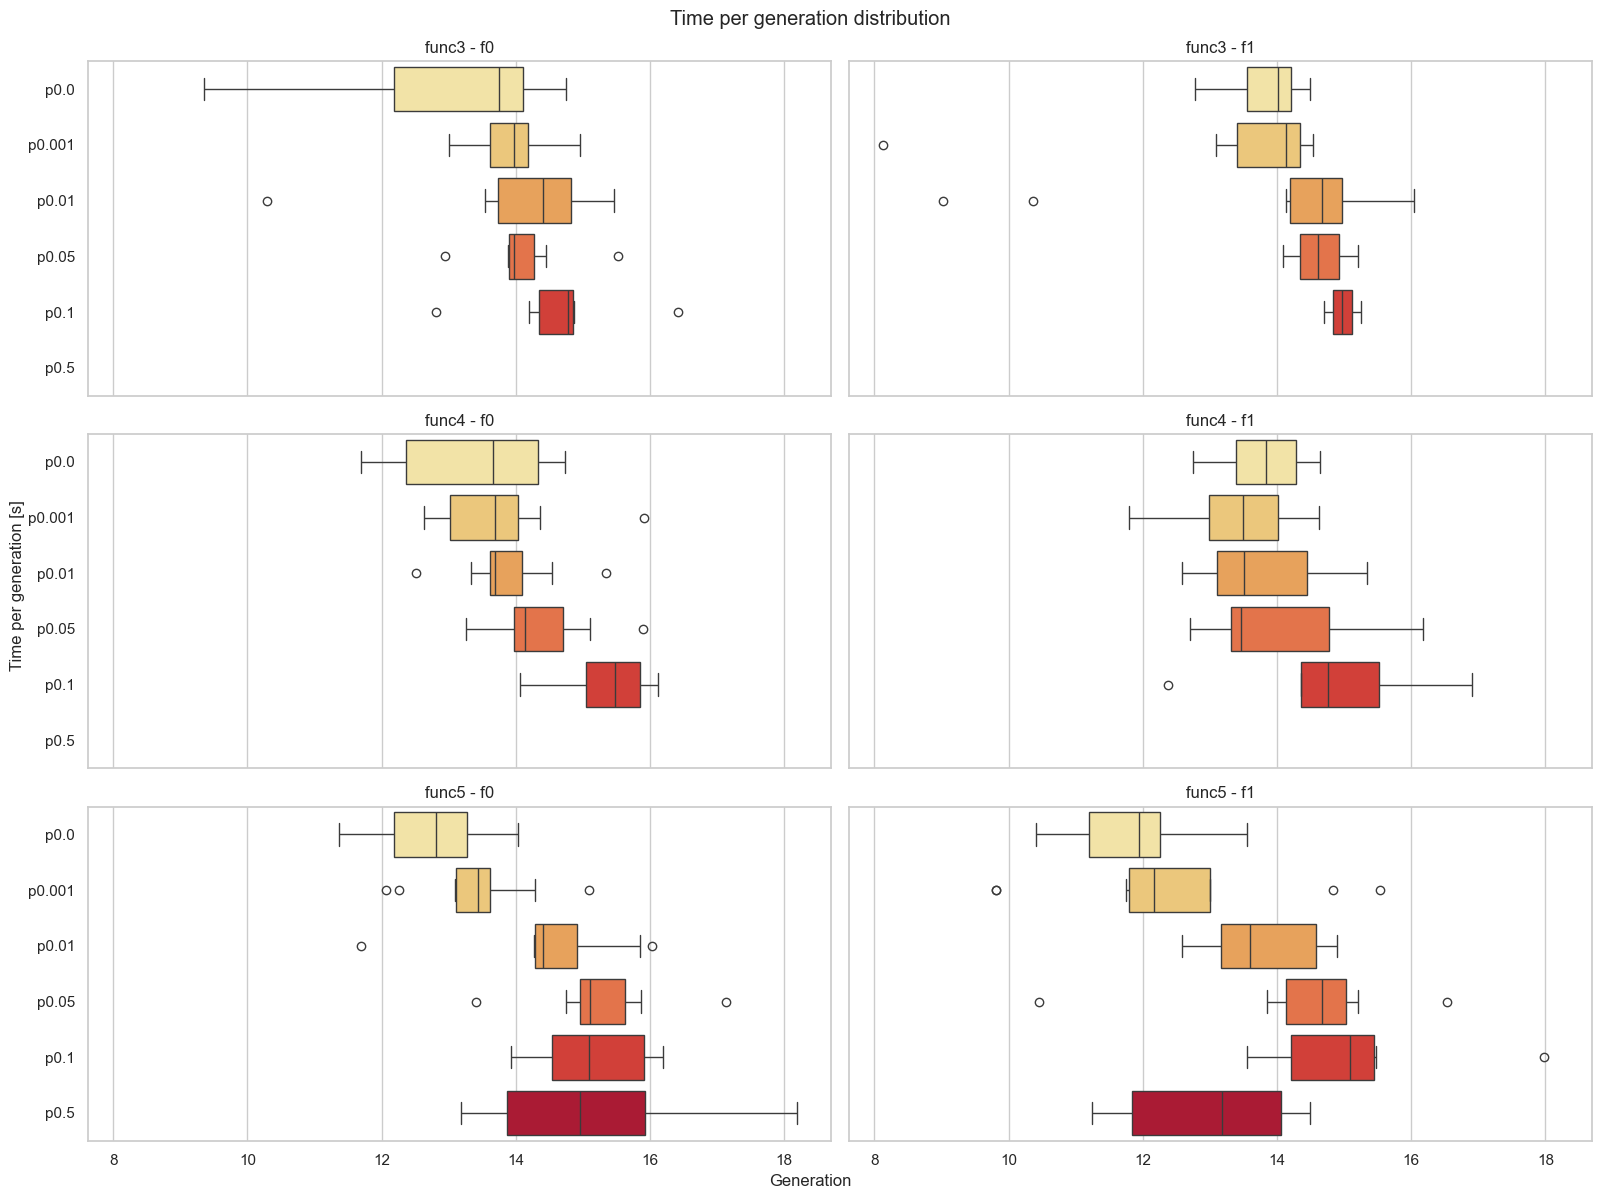

In [74]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12), sharey=True, sharex=True)
combinations = list(it.product(funcs, formats))

for (func, fmt), ax in zip(combinations, axs.flatten()):
    subset = end_results[(end_results.format == fmt) & (end_results.func == func)]
    sns.boxplot(y="prob", x="gen_time_s", data=subset, palette=custom_colors, hue="prob", ax=ax, order=probs)
    ax.set_title(f"{func} - {fmt}")
    ax.set_ylabel("")
    ax.set_xlabel("")

fig.text(0.5, 0, 'Time pre generation [s]', ha='center')
fig.text(0, 0.5, 'Randomizer Probability', va='center', rotation='vertical')

plt.suptitle("Time per generation distribution")
plt.tight_layout()
plt.show()